In [6]:
%matplotlib notebook
import cv2
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


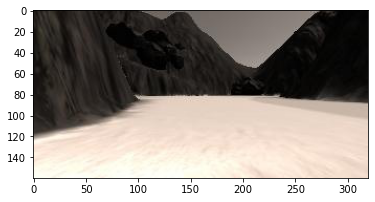

In [15]:
ex='/home/shaxpy/Downloads/Search and Sample bot/2.jpg'
img=mpimg.imread(ex)
plt.imshow(img)


In [8]:
%matplotlib inline

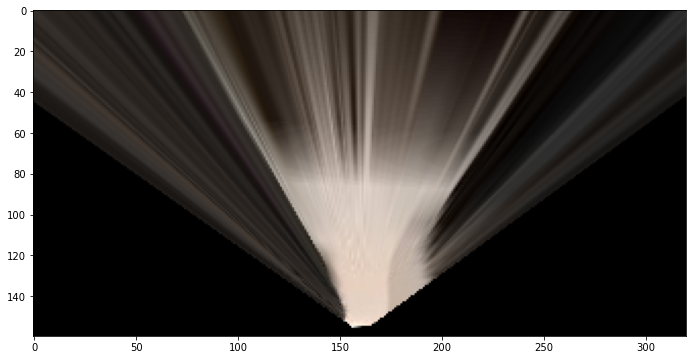

In [9]:
def perspect_transform(img,src,dst):
    m=cv2.getPerspectiveTransform(src,dst)
    warped=cv2.warpPerspective(img,m,(img.shape[1],img.shape[0]))
    return warped
sze=5
bottom=6
source=np.float32([[14,139],[301,140],[200,96],[118,96]])
dest=np.float32([[img.shape[1]/2-sze,img.shape[0]-bottom],
                 [img.shape[1]/2+sze,img.shape[0]-bottom],
                 [img.shape[1]/2+sze,img.shape[0]- 2*sze-bottom],
                 [img.shape[1]/2-sze,img.shape[0]- 2*sze-bottom],])

warped=perspect_transform(img,source,dest)
fig=plt.figure(figsize=(12,6))
plt.imshow(warped)

In [10]:
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    color_select = np.zeros_like(img[:,:,0])
    above= (img[:,:,0]>rgb_thresh[0]) \
            & (img[:,:,1] > rgb_thresh[1]) \
            & (img[:,:,2] > rgb_thresh[2])
    color_select[above] = 1
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)


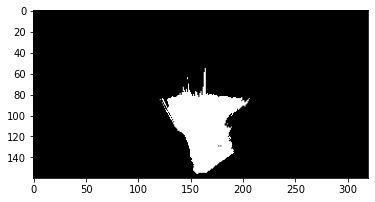

In [11]:
warped = perspect_transform(img,source,dest)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))

# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show() 

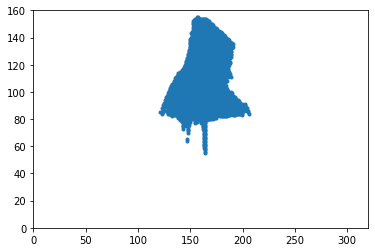

In [13]:
ypos, xpos = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()

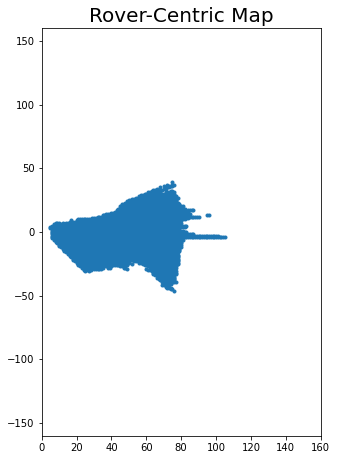

In [14]:
def rover_coords(binary_img):
    # Extract xpos and ypos pixel positions from binary_img and
    ypos, xpos = binary_img.nonzero()
    # Convert xpos and ypos to rover-centric coordinates
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel
xpix, ypix = rover_coords(colorsel)
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show() 